In [3]:
%matplotlib widget
import spectral as spy
import spectral.io.envi as envi

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import japanize_matplotlib

from PIL import Image
import csv
import mplcursors

from scipy.signal import argrelmax

In [4]:
HDR_PATH_iphone = '../data/iphone_image_200_2023-07-31_005/results/REFLECTANCE_2023-07-31_005.hdr'

IMG_PATH_iphone = '../data/iphone_image_200_2023-07-31_005/results/REFLECTANCE_2023-07-31_005.png'

In [5]:
spec_img_i = envi.open(HDR_PATH_iphone)

In [6]:
wave_lengthes = []
hdr = envi.read_envi_header(HDR_PATH_iphone)

for wl in hdr['wavelength']:
    wave_lengthes.append(float(wl))

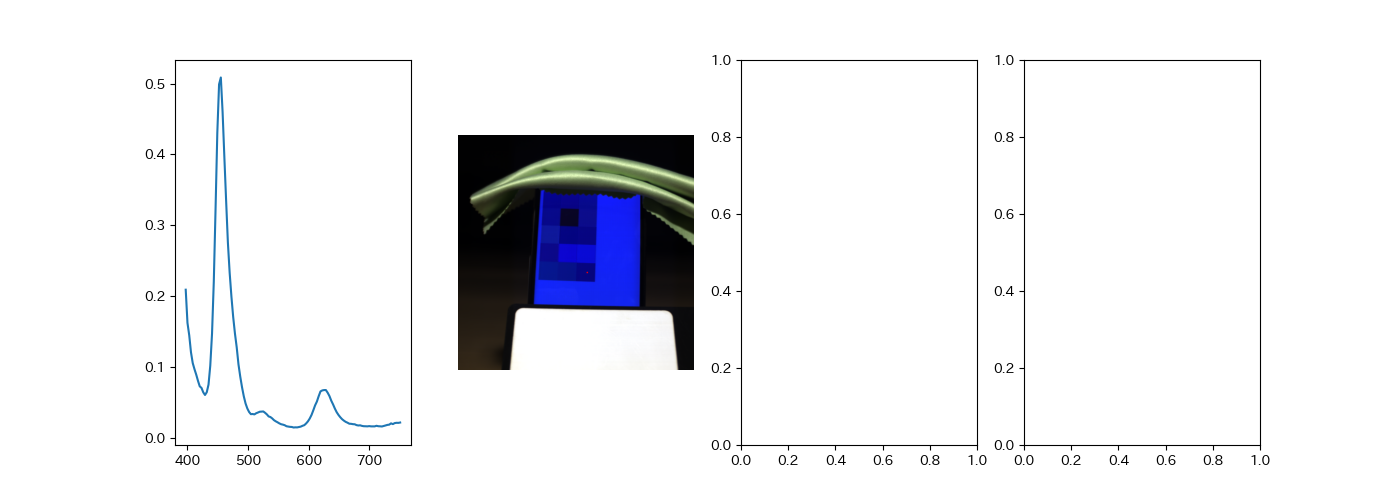

In [28]:
pixel_x = 280 # X座標
pixel_y = 300 # Y座標
color = (255, 0, 0)  # 色(RGB値)

coors = [(200,140),(240,140),(280,140),(280,180),(280,220),(240,220),(200,220),(200,260),(200,300),(240,300),(280,300)]
dots=[-1,0,1]
image_i = Image.open(IMG_PATH_iphone)
for i in dots:
    for j in dots:
        image_i.putpixel((pixel_x+i, pixel_y+j), color)
        

x = wave_lengthes[:121]
y_i = spec_img_i.read_pixel(512-pixel_x,pixel_y)[:121]

fig = plt.figure(figsize = (14,5))
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)


ax1.plot(x,y_i,label='iphone')


ax2.imshow(image_i)
ax2.axis('off')
mplcursors.cursor(hover=True)

plt.show()

In [31]:
a = []
for coor in coors:
    y_i = spec_img_i.read_pixel(512-coor[0],coor[1])[:121]
    ex_max_i=argrelmax(y_i,order=3)
    print(y_i[ex_max_i[0][0]])
    a.append(y_i[ex_max_i[0][0]])

0.5522388
0.5533049
0.5660981
0.543223
0.5138593
0.5106168
0.6137513
0.5480283
0.58746207
0.54499495
0.5085945


In [33]:
print(np.mean(a))

0.54928833
